# Clustering

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

### Iris 데이터를 활용하여 Kmeans clustering

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data[:, :2]
y = iris.target

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [ ]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

In [ ]:
centers = km.cluster_centers_
print(centers)

In [ ]:
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

### 2차원의 가상 데이터에 Kmeans clustering

In [ ]:
from sklearn.datasets import make_blobs
# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [ ]:
y_km

In [ ]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### k 를 4로 할경우 

In [ ]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [ ]:

plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='lightblue',
    marker='d', edgecolor='black',
    label='cluster 4'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)  # inertia: 군집 내 분산을 의미한다.

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.","hello kitty is my favorite character",
             "Merley has the best squooshy kitten belly.","Is Google translator so good?","google google"
             "google Translate app is incredible.","My dog s name is Kong","dog dog dog","cat cat"
             "If you open 100 tab in google you get a smiley face.","Kong is a very cute and lovely dog",
             "Best cat photo I've ever taken.","This is a cat house"
             "Climbing ninja cat kitty.","What's your dog's name?","Cat s paws look like jelly",
             "Impressed with google map feedback.","I want to join google","You have to wear a collar when you walk the dog",
             "Key promoter extension for google Chrome.","Google is the best company","Google researcher"]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

 

In [ ]:
# documents를 vectorize한 것이다.
X.data

In [ ]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [ ]:
model.labels_

In [ ]:
[x for x, y in zip(documents, model.labels_) if  y == 0]

In [ ]:
[x for x, y in zip(documents, model.labels_) if  y == 1]

In [ ]:
[x for x, y in zip(documents, model.labels_) if  y == 2]

In [ ]:
Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["I want to have a dog"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

# Hierarchical Clustering

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 계층적 군집분석 

In [ ]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [ ]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

In [ ]:
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
customer_data = pd.read_csv('/Users/jihun/Desktop/Fastcampus/Part 05~11) Machine Learning/09. 클러스터링/Data/shopping-data.csv')

In [ ]:
customer_data.head()

In [ ]:
data = customer_data.iloc[:, 3:5].values

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

### boston house 집값 데이터


In [ ]:
# 데이터 불러오기
data = pd.read_csv("/Users/jihun/Desktop/Fastcampus/Part 05~11) Machine Learning/09. 클러스터링/Data/Boston_house.csv") 

'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

data.head() # 데이터 확인

In [ ]:
target=data['Target']
data = data.drop(['Target'], axis = 1) 

In [ ]:
data.shape

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

In [ ]:
np.mean([x for x, y in zip(target,cluster.fit_predict(data)) if  y == 0])

In [ ]:
np.mean([x for x, y in zip(target,cluster.fit_predict(data)) if  y == 1])

In [ ]:
data.iloc[cluster.fit_predict(data)==0,:].describe()

In [ ]:
data.iloc[cluster.fit_predict(data)==1,:].describe()

# DBSCAN

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

In [ ]:
feature = data[['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.5,min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

### DBSCAN 결과 시각화

In [ ]:
#pairplot with Seaborn
sns.pairplot(r,hue='predict')
plt.show()

### 실제 데이터 시각화

In [ ]:
#pairplot with Seaborn
sns.pairplot(data,hue='labels')
plt.show()

### Kmeans 결과와 비교 

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(feature)

In [ ]:
new_labels =pd.DataFrame(km.labels_)
new_labels.columns=['predict']

In [ ]:
r2 = pd.concat([feature,new_labels],axis=1)

In [ ]:
#pairplot with Seaborn
sns.pairplot(r2,hue='predict')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [3]:
data = np.load('/Users/jihun/Desktop/Fastcampus/Part 05~11) Machine Learning/09. 클러스터링/Data/clusterable_data.npy')

In [ ]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [6]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.020})

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.03})

In [ ]:
dbs = DBSCAN(eps=0.03)
dbs2=dbs.fit(data)


In [ ]:
dbs2.labels_

### HDBSCAN
#### DBSCAN의 발전된 버젼, 하이퍼 파라미터에 덜민감함 

In [4]:
import hdbscan

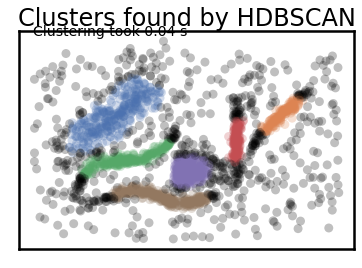

In [7]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':45})